### Purpose
This notebook simply takes two images and makes a "hybrid" which combines the low-frequency part of one image with the high-frequencies of the other

### Still needed
-Framework should be converted into a .py file and be callable (play with classes)

-Currently only works for horizontal scaling

-Would be cool to create an animation that shows it working

-Would like to be able to select pixels that must be kept or must be removed. How to do this interface? GUI?


In [1]:
__author__="Matt Gomer"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rc('image', cmap='gray')
import scipy
from scipy import signal
from scipy import fftpack
from PIL import Image
import time
import copy
import sys

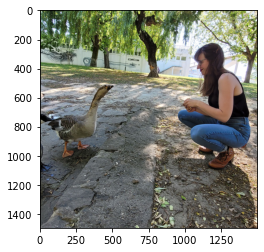

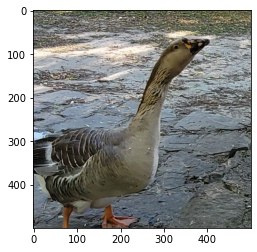

(500, 500, 3) (500, 500, 3)


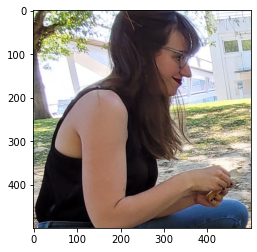

In [194]:
source_image=np.array(mpimg.imread('/home/matt/gitrepositories/image_processing/images/goose.jpg'))
image_size=500 #pixesl
ximage,yimage=100,450
plt.imshow(source_image)
plt.show()
image1=source_image[yimage:yimage+image_size,ximage:ximage+image_size]
plt.imshow(image1)
plt.show()

ximage,yimage=940,250
image2=source_image[yimage:yimage+image_size,ximage:ximage+image_size]
image2=Image.fromarray(image2)
image2 = np.array(image2.transpose(method=Image.FLIP_LEFT_RIGHT))

print(np.shape(image1),np.shape(image2))

plt.imshow(image2)
plt.show()



[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


<ipython-input-197-ed7bcdc56ed0>:40: RuntimeWarning: divide by zero encountered in log10
  im=plt.imshow(np.log10(np.abs(F2_low)))


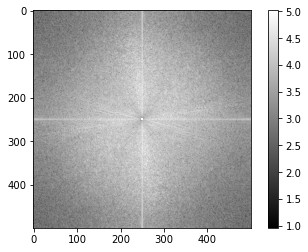

Error: problem with fft: output is complex
mean imaginary term:  0.22967697325230052


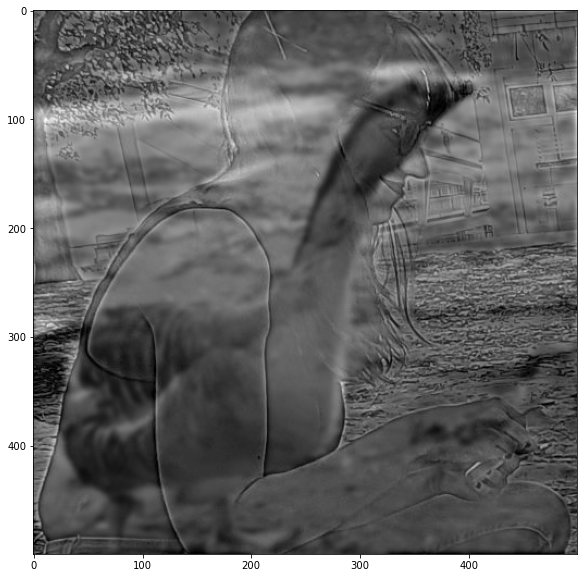

In [197]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


# mask=scipy.ndimage.gaussian_filter(image1, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

filter_rad=30

                   
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length `l` and a sigma of `sig`
    taken from https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
    """
    
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

print(gkern(5,1))
mask=gkern(img_height,sig=filter_rad)
mask[np.where(mask<0.00000001)]=0 #cut off gaussian below some value
mask=mask*(1/np.max(mask))

F1 = fftpack.fftshift( fftpack.fft2(rgb2gray(image1)))
F2 = fftpack.fftshift( fftpack.fft2(rgb2gray(image2)))
img_height=np.shape(image1)[0]
img_width=np.shape(image1)[1]

F1_high=mask*F1
low_mask=(1-mask)
# print(mask[300,300])
# print(low_mask[300,300])
F2_low=low_mask*F2

# print(np.min(np.abs(F1_high)))
Fsum=F1_high+F2_low
# print(np.mean(np.abs(F1_high)))
im=plt.imshow(np.log10(np.abs(F2_low)))
plt.colorbar(im)
plt.show()
hybrid_img = fftpack.ifft2(Fsum)
if np.all(np.imag(hybrid_img)<10**-9):
    hybrid_img=np.abs(hybrid_img)
else:
    print('Error: problem with fft: output is complex')
    print('mean imaginary term: ',np.mean(np.abs(np.imag(hybrid_img))))
    hybrid_img=np.abs(hybrid_img)
#     print(np.mean(np.abs(np.real(hybrid_img))))
        

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(hybrid_img) 